In [1]:
import pandas as pd
import numpy as np


In [2]:
train_data=pd.read_csv('C:/Users/Quanfab/Desktop/sentiment_analysis_visulization_updated/new project/train.csv')
test_data=pd.read_csv('C:/Users/Quanfab/Desktop/sentiment_analysis_visulization_updated/new project/test.csv')

In [3]:
train_data.tail()

,qid,question_text,target
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0
1306121,ffffed09fedb5088744a,Who wins in a battle between a Wolverine and a...,0


In [4]:
test_data.head()

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


In [5]:
"""To implement a bag of word classification, we need our data in a format that allows us to feed it to a classifier """

'To implement a bag of word classification, we need our data in a format that allows us to feed it to a classifier '

In [6]:
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer


In [7]:
# We need to remove punctuation ,stop words,convert text to lower case and stem words or lemmatize.
# For we create a stemmer

stemmer=PorterStemmer()

def stem_tokens(tokens,stemmer):
    stemmed=[stemmer.stem(items) for items in tokens ]
    return (stemmed)


In [8]:
#Now we have our tokenizer which remove non letters and stems words.

def tokenize(text):
    text=re.sub("[^a-zA-Z]"," ",text)
    tokens=nltk.word_tokenize(text)
    stems=stem_tokens(tokens,stemmer)
    return (stems)

In [9]:
vectorizer=CountVectorizer(
          analyzer='word',
          tokenizer=tokenize,
          lowercase=True,
          stop_words='english',
          max_features=85)


In [10]:
#Next, we use the fit_transform() method to transform our corpus data into feature vectors.
#Since the input needed is a list of strings,
#we concatenate all of our training and test data.

features=vectorizer.fit_transform(train_data.question_text.tolist() + test_data.question_text.tolist() )

C:\Users\Quanfab\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'st

In [11]:
#here now i convert this feature into nd_array for easy use

In [12]:
features_nd=features.toarray()

In [13]:
# Now will use classifier to classify labels
#First will split Training and Test data to easy classify
from sklearn.model_selection import train_test_split

X_train,X_test, Y_train,Y_test = train_test_split(features_nd[0:len(train_data)],
                                 train_data.target,
                                 train_size=0.85,
                                 random_state=1234)


C:\Users\Quanfab\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [14]:
# now ready to train our classifier 
from sklearn.linear_model import LogisticRegression 
model=LogisticRegression()


In [16]:
log_model=model.fit(X_train,Y_train)

C:\Users\Quanfab\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [19]:
#Now will predict class label for test data
y_prediction=log_model.predict(X_test)

In [21]:
y_prediction

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [22]:
#Now will find accuracy of our model
from sklearn.metrics import classification_report
print(classification_report(y_prediction,Y_test))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    193244
           1       0.13      0.57      0.21      2675

   micro avg       0.94      0.94      0.94    195919
   macro avg       0.56      0.76      0.59    195919
weighted avg       0.98      0.94      0.96    195919



In [30]:
#Finally, we can re-train our model with all the training data and use it
#for sentiment classification with the original unlabeled test set.
model1=LogisticRegression()
log1_model=model1.fit(features_nd[0:len(train_data)],train_data.target)
test_prediction=log_model.predict(features_nd[len(train_data):])



C:\Users\Quanfab\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
test_prediction

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
test_data['Prediction']=test_prediction

In [36]:
test_data.tail(15)

,qid,question_text,Prediction
375791,fffd9600a2a09be911aa,Do we have any other source apart from Control...,0
375792,fffd9984aa992bb5dc59,What are some example of bad parenting and its...,0
375793,fffe18f21e5e070e55de,What would you like DC to do to make their mov...,0
375794,fffe22b68a6853b5b790,Why are Mexican people always in relationships...,1
375795,fffe408457ee7aabb690,"Wheat a person texts us on WhatsApp, why do th...",0
375796,fffe49a6831dacba5b55,Why should one prefer MI band over a normal wa...,0
375797,fffe4dd6bb7fd8fc1924,Do you think our system is fair? Consider fact...,0
375798,fffe7f11eb04763ddf91,Is it really difficult to get accepted to Ivy ...,0
375799,fffed08be2626f74b139,Why do all the stupid people I know tend to be...,0
375800,ffff4202a8b819a470c5,How can I prepare for JEE Mains 2018 if I star...,0


In [39]:
test_data.loc[375794]

qid                                           fffe22b68a6853b5b790
question_text    Why are Mexican people always in relationships...
Prediction                                                       1
Name: 375794, dtype: object

In [43]:
import random
spl = random.sample(range(len(test_prediction)), 15)
for text, sentiment in zip(test_data.question_text[spl], test_prediction[spl]):
    print(sentiment, text)

0 Whenever I am sad or in a bad mood for too long, I start having suicidal thoughts. What does it mean?
0 Which hospital in Mumbai Rashtriya Arogya Nidhi (RAN) services are available?
1 Why do Americans think everything is about them?
0 Does the USA public school system hire black English language teachers who talk like Bishop Michael Curry (Prince Harry's wedding) to teach in predominantly white schools?
0 What are some of the most obscure 2 Chainz lyrics?
0 Who is worse - the alt-right or SJWs?
0 When it comes to songs, what comes first, the rhythm or the lyrics?
0 How many days will I wait to get my parcel from China to Namibia?
0 What is the best way for a new copywriter to improve their portfolio?
0 What is real time pain relief?
0 Was there any mention of Camels in original version of Mahabharata?
0 Which is the best book on technical analysis?
0 How do I become special kids psychologist?
0 How do I crack IAS with an IT job without coaching?
0 What happens if you weigh 140 pounds

In [44]:
test_data.to_csv('C:/Users/Quanfab/Desktop/sentiment_analysis_visulization_updated/new project/prediction.csv')

In [56]:
Negative_reviews=test_data[test_data['Prediction']==1]

In [58]:
Positive_reviews=test_data[test_data['Prediction']==0]

In [65]:
print('Total Question to classify ='+ str(len(test_data)))
print("Sincere Questions =" + str(len(Positive_reviews)))
print("Insincere Questions = "+ str(len(Negative_reviews)))

Total Question to classify =375806
Sincere Questions =370728
Insincere Questions = 5078


In [69]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

per_positive=len(Positive_reviews)*100/len(test_data['Prediction'])
per_negative=len(Negative_reviews)*100/len(test_data['Prediction'])


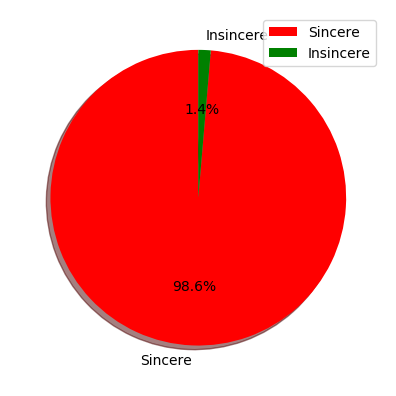

In [71]:
percentage=[per_positive,per_negative]
activities=['Sincere','Insincere']
colors=['r','g']
plt.pie(percentage,labels=activities,colors=colors,startangle=90,autopct='%.1f%%',shadow=True)
plt.legend(activities,loc='best')
plt.show()